In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Load the required dataset for Boston_housing

In [3]:
file_path = "C:/Users/alluc/Downloads/boston.csv"

dataset = pd.read_csv(file_path)

print(dataset.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
##Lets check the description of the dataset 
dataset.keys()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Set a random seed for reproducibility
np.random.seed(42)

# Add a synthetic 'price' variable
dataset['SalesPrice'] = (
    5000 +                 # Base price
    (dataset['RM'] * 8000) -    # Positive impact of more rooms
    (dataset['AGE'] * 50) -     # Negative impact of age
    (dataset['TAX'] * 5) -      # Negative impact of taxes
    (dataset['LSTAT'] * 1500) + # Negative impact of lower-status percentage
    np.random.normal(0, 10000, len(dataset))  # Add noise for variability
)


# Remove the 'price' column
if 'price' in dataset.columns:  # Check if the column exists
    dataset = dataset.drop(columns=['price'])

# Round 'SalesPrice' to 2 decimal places
dataset['SalesPrice'] = dataset['SalesPrice'].round(2)

# Verify the change
print(dataset.head())  # The 'price' column should no longer be in the dataset



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  SalesPrice  
0     15.3  396.90   4.98  24.0    50357.14  
1     17.8  396.90   9.14  21.6    36120.36  
2     17.8  392.83   4.03  34.7    58646.89  
3     18.7  394.63   2.94  33.4    68404.30  
4     18.7  396.90   5.33  36.2    48019.47  


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  SalesPrice  506 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


In [7]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,SalesPrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,30912.158715
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,18623.166013
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,-33202.140000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,19407.465000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,30973.805000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,45070.995000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,76596.690000


In [8]:
## Check the missing Values
dataset.isnull().sum()

CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
SalesPrice    0
dtype: int64

Prepaing the Dataset

In [10]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,SalesPrice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.362759
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.376754
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.533031
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.071965
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.517024
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.684476
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.502212
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.420614
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.422896
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.479597


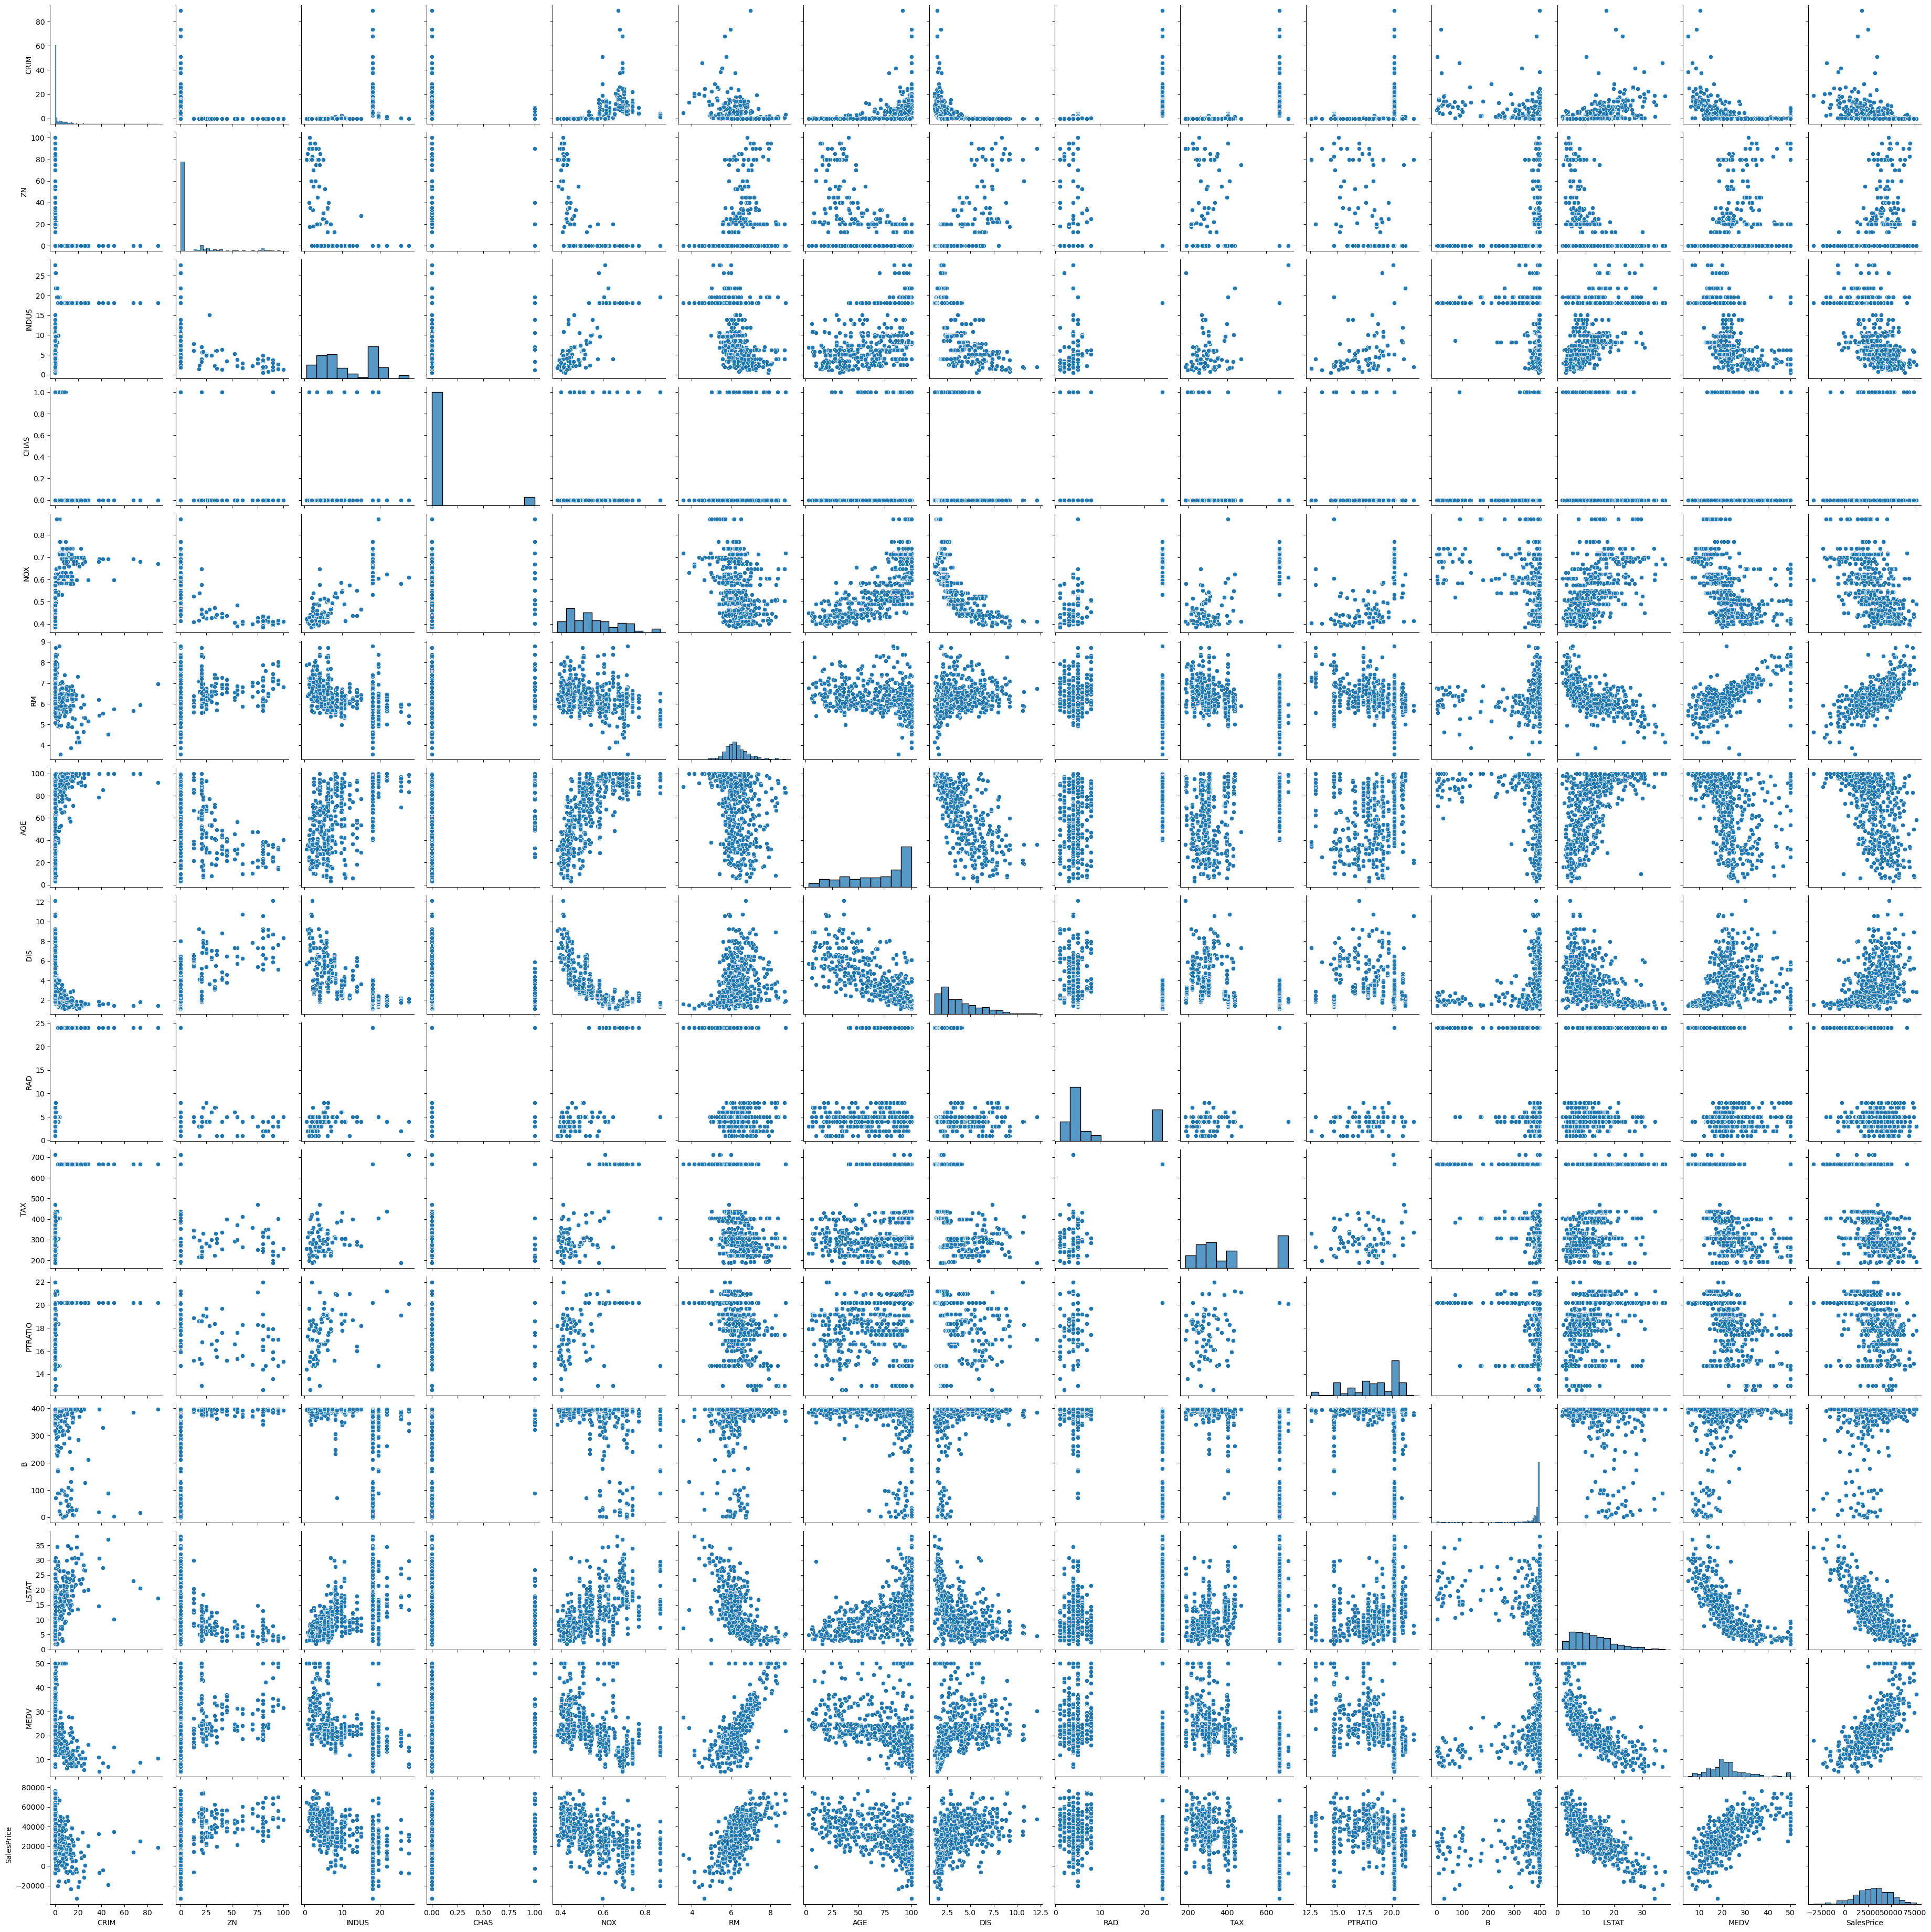

In [11]:
import seaborn as sns
sns.pairplot(dataset)

Analyzing The Correlated Features

In [13]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,SalesPrice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.362759
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.376754
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.533031
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.071965
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.517024
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.684476
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.502212
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.420614
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.422896
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.479597


Text(0, 0.5, 'Price')

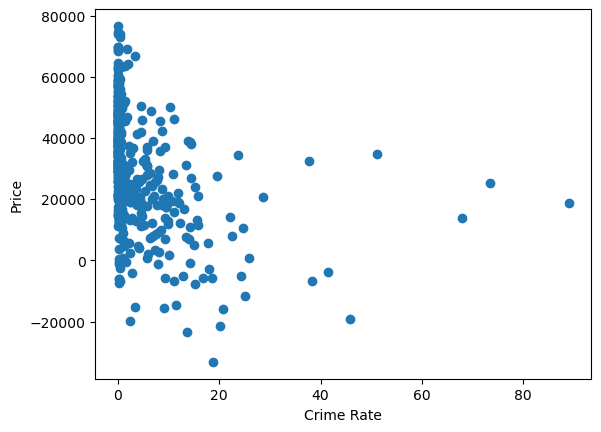

In [14]:
plt.scatter(dataset['CRIM'],dataset['SalesPrice'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

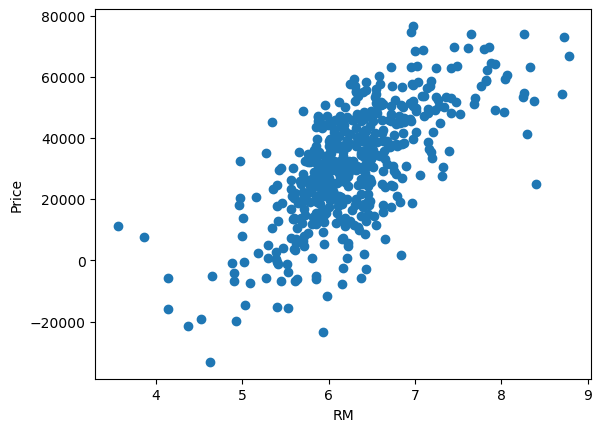

In [15]:
plt.scatter(dataset['RM'],dataset['SalesPrice'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='SalesPrice'>

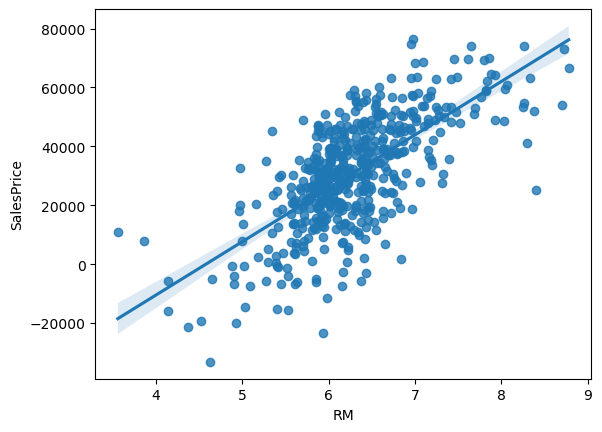

In [16]:
import seaborn as sns
sns.regplot(x="RM",y="SalesPrice",data=dataset)

<Axes: xlabel='LSTAT', ylabel='SalesPrice'>

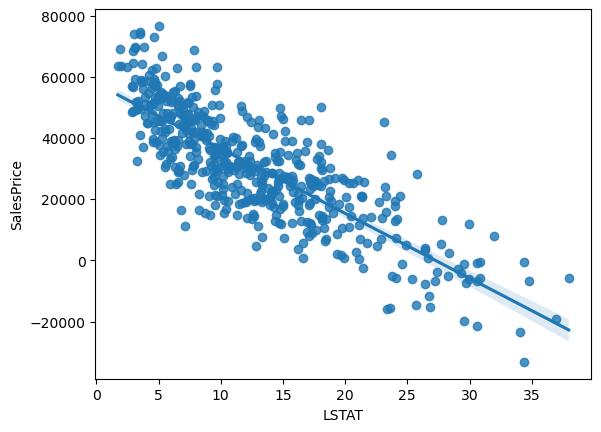

In [17]:
sns.regplot(x="LSTAT",y="SalesPrice",data=dataset)

<Axes: xlabel='CHAS', ylabel='SalesPrice'>

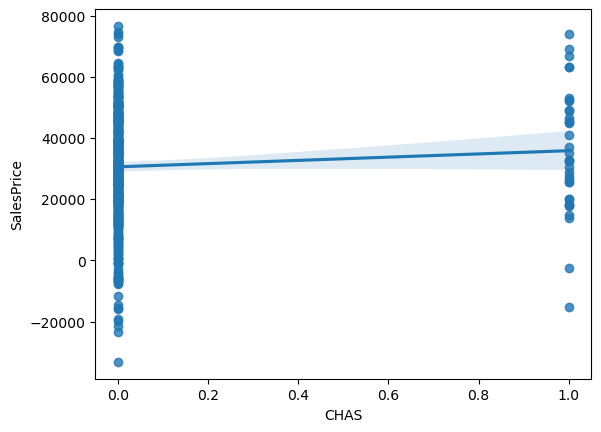

In [18]:
sns.regplot(x="CHAS",y="SalesPrice",data=dataset)

<Axes: xlabel='PTRATIO', ylabel='SalesPrice'>

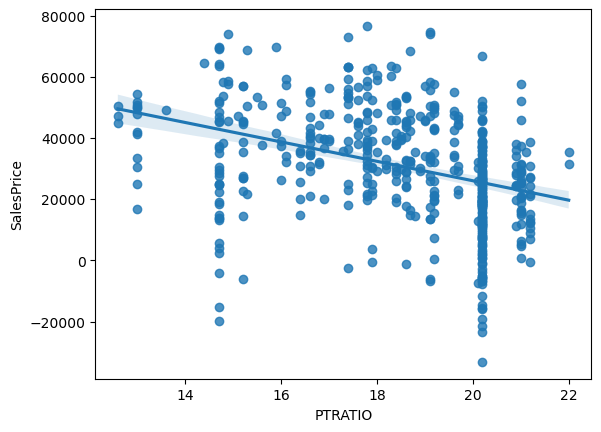

In [19]:
sns.regplot(x="PTRATIO",y="SalesPrice",data=dataset)

In [20]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04,21.2
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21,19.3
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27,13.4


In [124]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52,17.1
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666.0,20.2,100.19,16.22,14.3


In [165]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [163]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.39651419,
        -1.01531611,  0.60629225],
       [-0.40200818, -0.50512499, -0.16208345, ...,  0.3870674 ,
        -0.05366252, -0.19368088],
       [-0.39721053, -0.50512499, -0.60948856, ...,  0.42854113,
        -0.31132373, -0.39634074],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ...,  0.35987906,
        -0.90549329,  0.1583073 ],
       [ 0.92611293, -0.50512499,  1.00549958, ..., -2.87841346,
         1.52750437, -1.02565293],
       [-0.39030549, -0.50512499, -0.37135358, ..., -3.32828832,
        -0.25218837, -0.4710049 ]])

In [161]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ...,  0.41241246,
        -0.47605794,  0.06231052],
       [-0.41105674,  1.26662874, -0.68165068, ...,  0.42854113,
        -1.25185755,  1.00094566],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.35031705,
         0.79535229, -1.00432031],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ...,  0.25688594,
        -1.09697922,  2.87821594],
       [ 0.25423453, -0.50512499,  1.00549958, ..., -2.98970133,
         0.53487511, -0.92965616],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.33199949,
         0.56585078, -1.1109834 ]])


Model Training

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
regression=LinearRegression()

In [129]:

regression.fit(X_train,y_train)

LinearRegression()

In [130]:
## print the coefficients and the intercept
print(regression.coef_)

[  651.85905527  -290.87135931   694.20808737  -319.9604631
  -288.88557717  5282.1452486  -1275.33469221   978.14812834
  -347.17292462  -628.17974747   206.86878233   -11.16096123
 -9714.76883382  1596.65623961]


In [131]:
print(regression.intercept_)

31741.447627118643


In [132]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [133]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [134]:
reg_pred

array([ 35726.58609447,  49238.70939318,  18374.19770842,  43725.71045583,
        21300.03140331,  32060.59752514,  19699.78283951,  12166.62162882,
        28166.48339429,  24835.68861858,  19185.64615222,  22615.2939777 ,
       -17712.84021537,  32811.40514921,  28066.8477745 ,  37734.80840924,
        21192.4654151 ,  -8364.85814859,  61859.0119267 ,  18922.94726314,
        42700.06595944,  42934.72931622,  11250.69128704,  37860.83315688,
        20742.39183106,  13738.38870839,  35011.5271291 ,  22644.54120439,
        20772.9282116 ,  24297.39064171,  21483.09824282,  41382.57706425,
        34299.8857548 ,  24331.45915111,  14337.62886365,  19704.3633384 ,
        53090.8913722 ,  33601.22892192,  27256.41020357,  42472.51648372,
        11787.14345621,  42486.6002914 ,  63101.16028356,  27404.58662184,
        37228.55732002,  16787.79171078,  16798.68992385,  44967.67562117,
        23267.82124085,  43614.27643795,  27855.53906453,  51223.75662061,
        20134.8591284 ,  


Assumptions

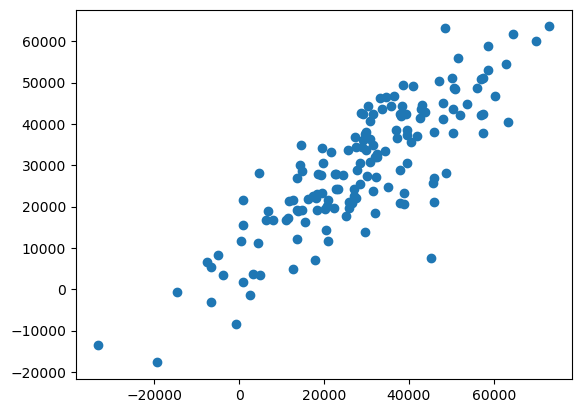

In [136]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [137]:
## Residuals
residuals=y_test-reg_pred


In [138]:
residuals

173     4767.933906
274    -8199.799393
491    13689.242292
72      -758.970456
452    -9606.291403
           ...     
441     -651.188283
23    -14760.225977
225     9480.232398
433     7925.345281
447    -8723.934575
Name: SalesPrice, Length: 152, dtype: float64

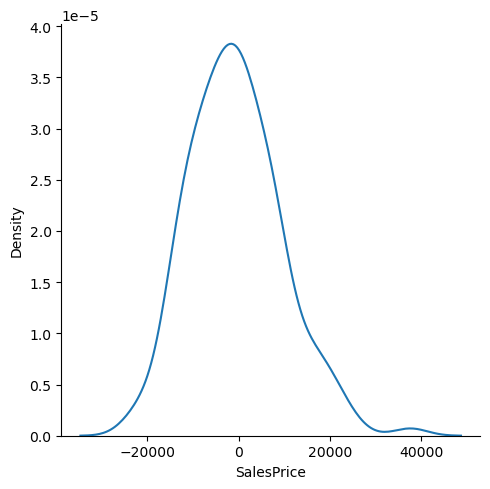

In [139]:

## Plot this residuals 

sns.displot(residuals,kind="kde")

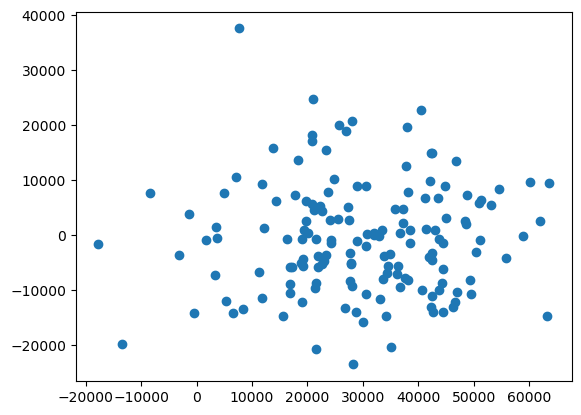

In [140]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7926.3895122494705
101369037.47077663
10068.219180708009


R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [143]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)


0.7087138487902173


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [145]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6789473807833781

In [149]:
# Save the model for deployment
pickle.dump(regression, open('regmodel.pkl', 'wb'))


New Data Prediction

In [159]:
# Select the first row of the dataset as new data and retain feature names
new_data = X.iloc[0:1]  # Keep it as a DataFrame instead of converting to an array

# Apply scaling
new_data_scaled = scaler.transform(new_data)





Pickling The Model file For Deployment

In [153]:

# Prediction
predicted_value = regression.predict(new_data_scaled)
print("Predicted Value for New Data:", predicted_value)

# Deployment example: Load model and make predictions
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
predicted_value_from_pickled = pickled_model.predict(new_data_scaled)
print("Predicted Value from Pickled Model:", predicted_value_from_pickled)


Predicted Value for New Data: [43614.27643795]
Predicted Value from Pickled Model: [43614.27643795]
